<a id='toc'></a>
## Contents:
- <a href="#Histogram">Histogram</a>
- <a href="#LinePlot">Line Plot</a>
- <a href="#ViolinPlot">Violin Plot</a>
- <a href="#BoxPlot">Box Plot</a>
- <a href="#RidgeLinePlot">Ridge Line Plot</a>
- <a href="#QQPlot">QQ Plot</a>

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

Data Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv

In [3]:
df = pd.read_csv('../Datasets/housing_train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Columns

In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [4]:
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
print('Number of numerical columns: ', len(numerical_cols))
# numerical_cols

Number of numerical columns:  38


In [5]:
categorical_columns = [cname for cname in df.columns if df[cname].dtype=='object']
print('Number of categorical columns: ', len(categorical_columns))
# categorical_columns

Number of categorical columns:  43


# Missing Value Analysis

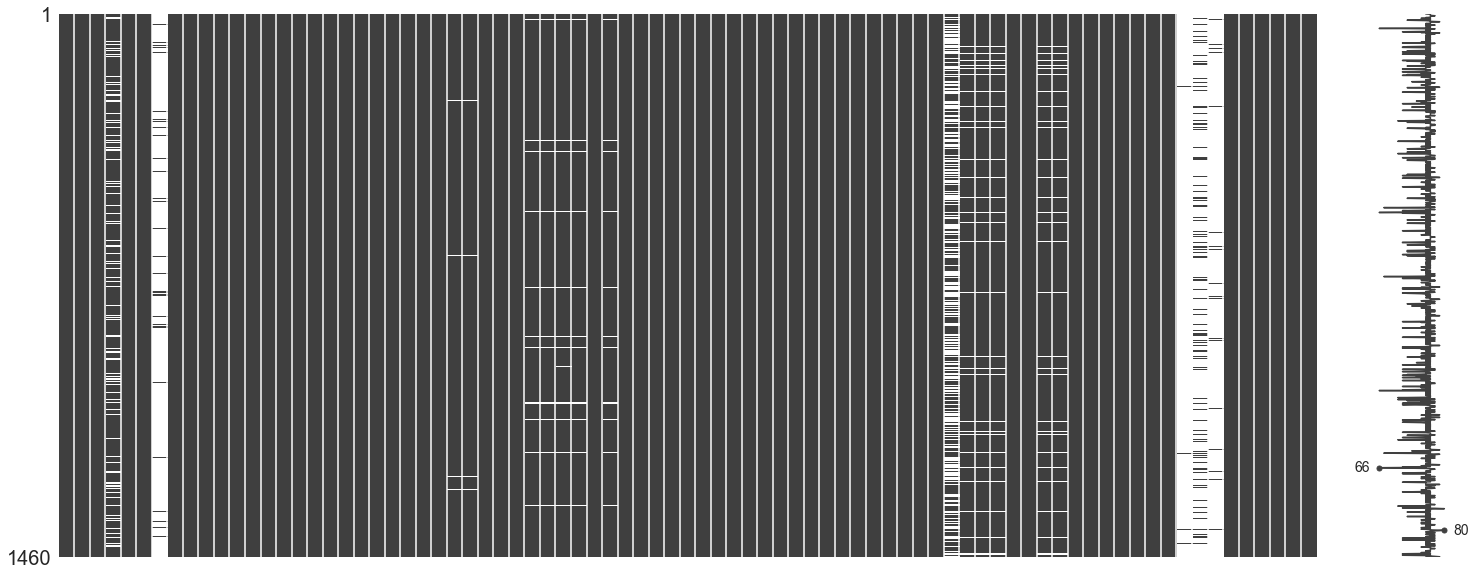

In [10]:
msno.matrix(df)

In [11]:
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
print('Columns with missing values in df: ', cols_with_missing)

Columns with missing values in df:  ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


## Handling Missing Values

### 1. Omit Data

We filter out columns which contain more than 90% missing values.

In [12]:
nv1 = df.isnull().sum()
nv2 = nv1.where(nv1>0).dropna()/df.shape[0]*100
nv2.where(nv2>90).dropna()

Alley          93.767123
PoolQC         99.520548
MiscFeature    96.301370
dtype: float64

We see here PoolQC contains 99% missing values and we decide to go ahead and drop it.

In [13]:
cols_to_drop = ['PoolQC']

X = df.drop(cols_to_drop, axis=1)

if 'PoolQC' in X.columns:
    print('Drop Failed')
else:
    print('Drop Passed')

Drop Passed


### 2. Imputation

```python
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
```

```python
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
```

```python
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_columns)
    ])
```

Additional Notes on how to use these objects:

```python
linear_reg_pipe = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])
```

```python
linear_reg_pipe.fit(X_train, y_train)
linear_reg_preds = linear_reg_pipe.predict(X_test)
```

# Unique Values 

In [14]:
df[numerical_cols].nunique()

Id               1460
MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [15]:
df[categorical_columns].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

<a id='Histogram'></a>
# Histogram
<a href="#toc">[Back to top]</a>

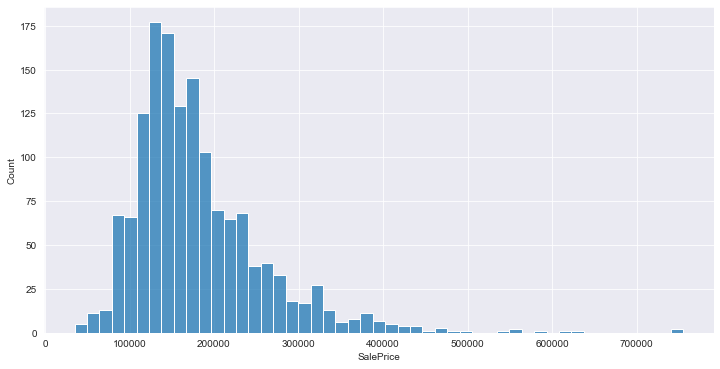

In [7]:
plt.figure(figsize=(12,6))
sns.histplot(df['SalePrice'])

<a id='LinePlot'></a>
# Line Plot 
<a href="#toc">[Back to top]</a>

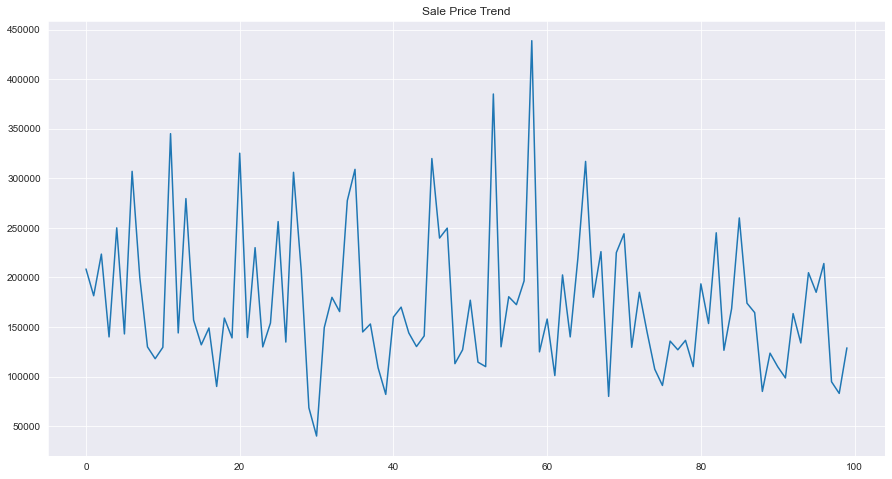

In [17]:
plt.figure(figsize=(15,8))
plt.xlabel = 'House ID'
plt.ylabel = 'Sale Price'
plt.title('Sale Price Trend')
sns.lineplot(data=df[:100]['SalePrice'])

<a id="ViolinPlot"></a>
# Violin Plot
<a href="#toc">[Back to top]</a>

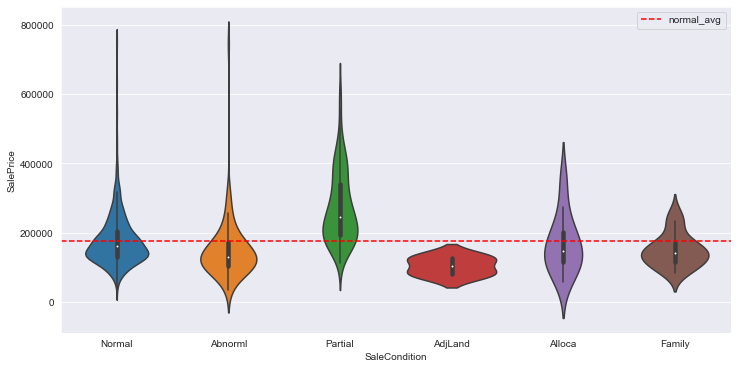

In [18]:
plt.figure(figsize=(12,6))
sns.violinplot(x = df['SaleCondition'], y = df['SalePrice'])
plt.axhline(df[df['SaleCondition'] == 'Normal']['SalePrice'].mean(),\
            color='r',linestyle='dashed',label='normal_avg')
plt.legend()

<a id="BoxPlot"></a>
# Box Plot
<a href="#toc">[Back to top]</a>

These plots are useful for outlier detection.

 - Horizontal


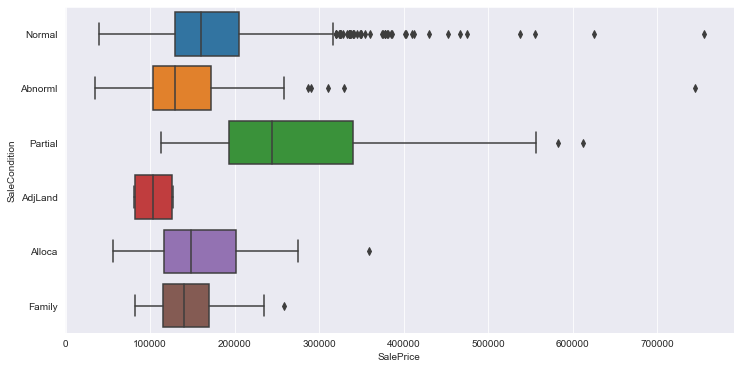

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, y='SaleCondition', x='SalePrice', orient='h')

- Vertical

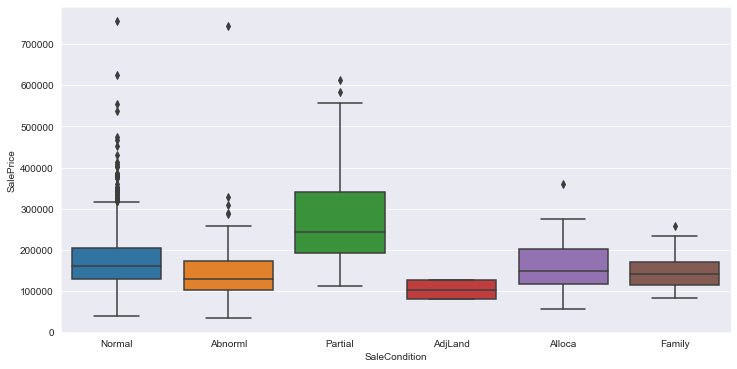

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='SaleCondition', y='SalePrice', orient='v')

<a id="RidgeLinePlot"></a>
# Ridge Line Plot
<a href="#toc">[Back to top]</a>

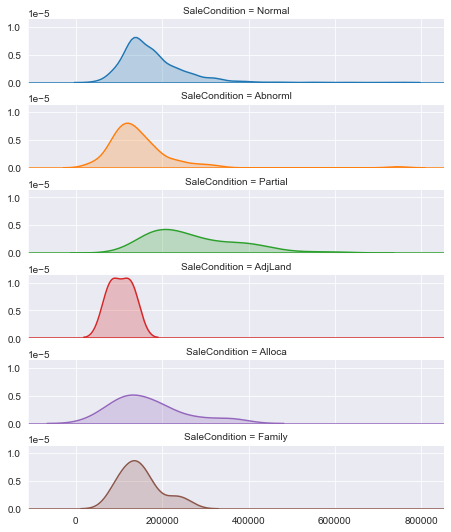

In [21]:
ridge_plot = sns.FacetGrid(df, row="SaleCondition", hue="SaleCondition", aspect=5, height=1.25)  
ridge_plot.map(sns.kdeplot, 'SalePrice', shade=True)
ridge_plot.map(plt.axhline)
ridge_plot.fig.subplots_adjust(hspace=0.35)

<a id="QQPlot"></a>
## QQ Plots
<a href="#toc">[Back to top]</a>

Source: https://seaborn-qqplot.readthedocs.io/en/latest/

In [65]:
from seaborn_qqplot import pplot

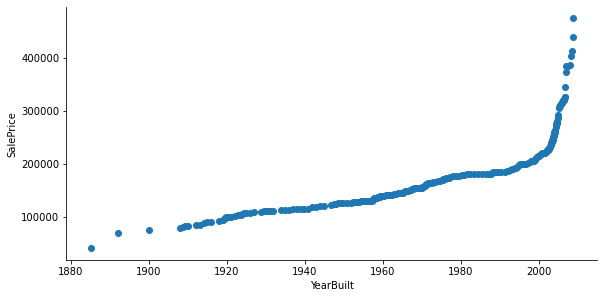

In [82]:
pplot(df.iloc[:250,:], x='YearBuilt', y='SalePrice', kind='qq', height=4, aspect=2)

# Univariate Analysis

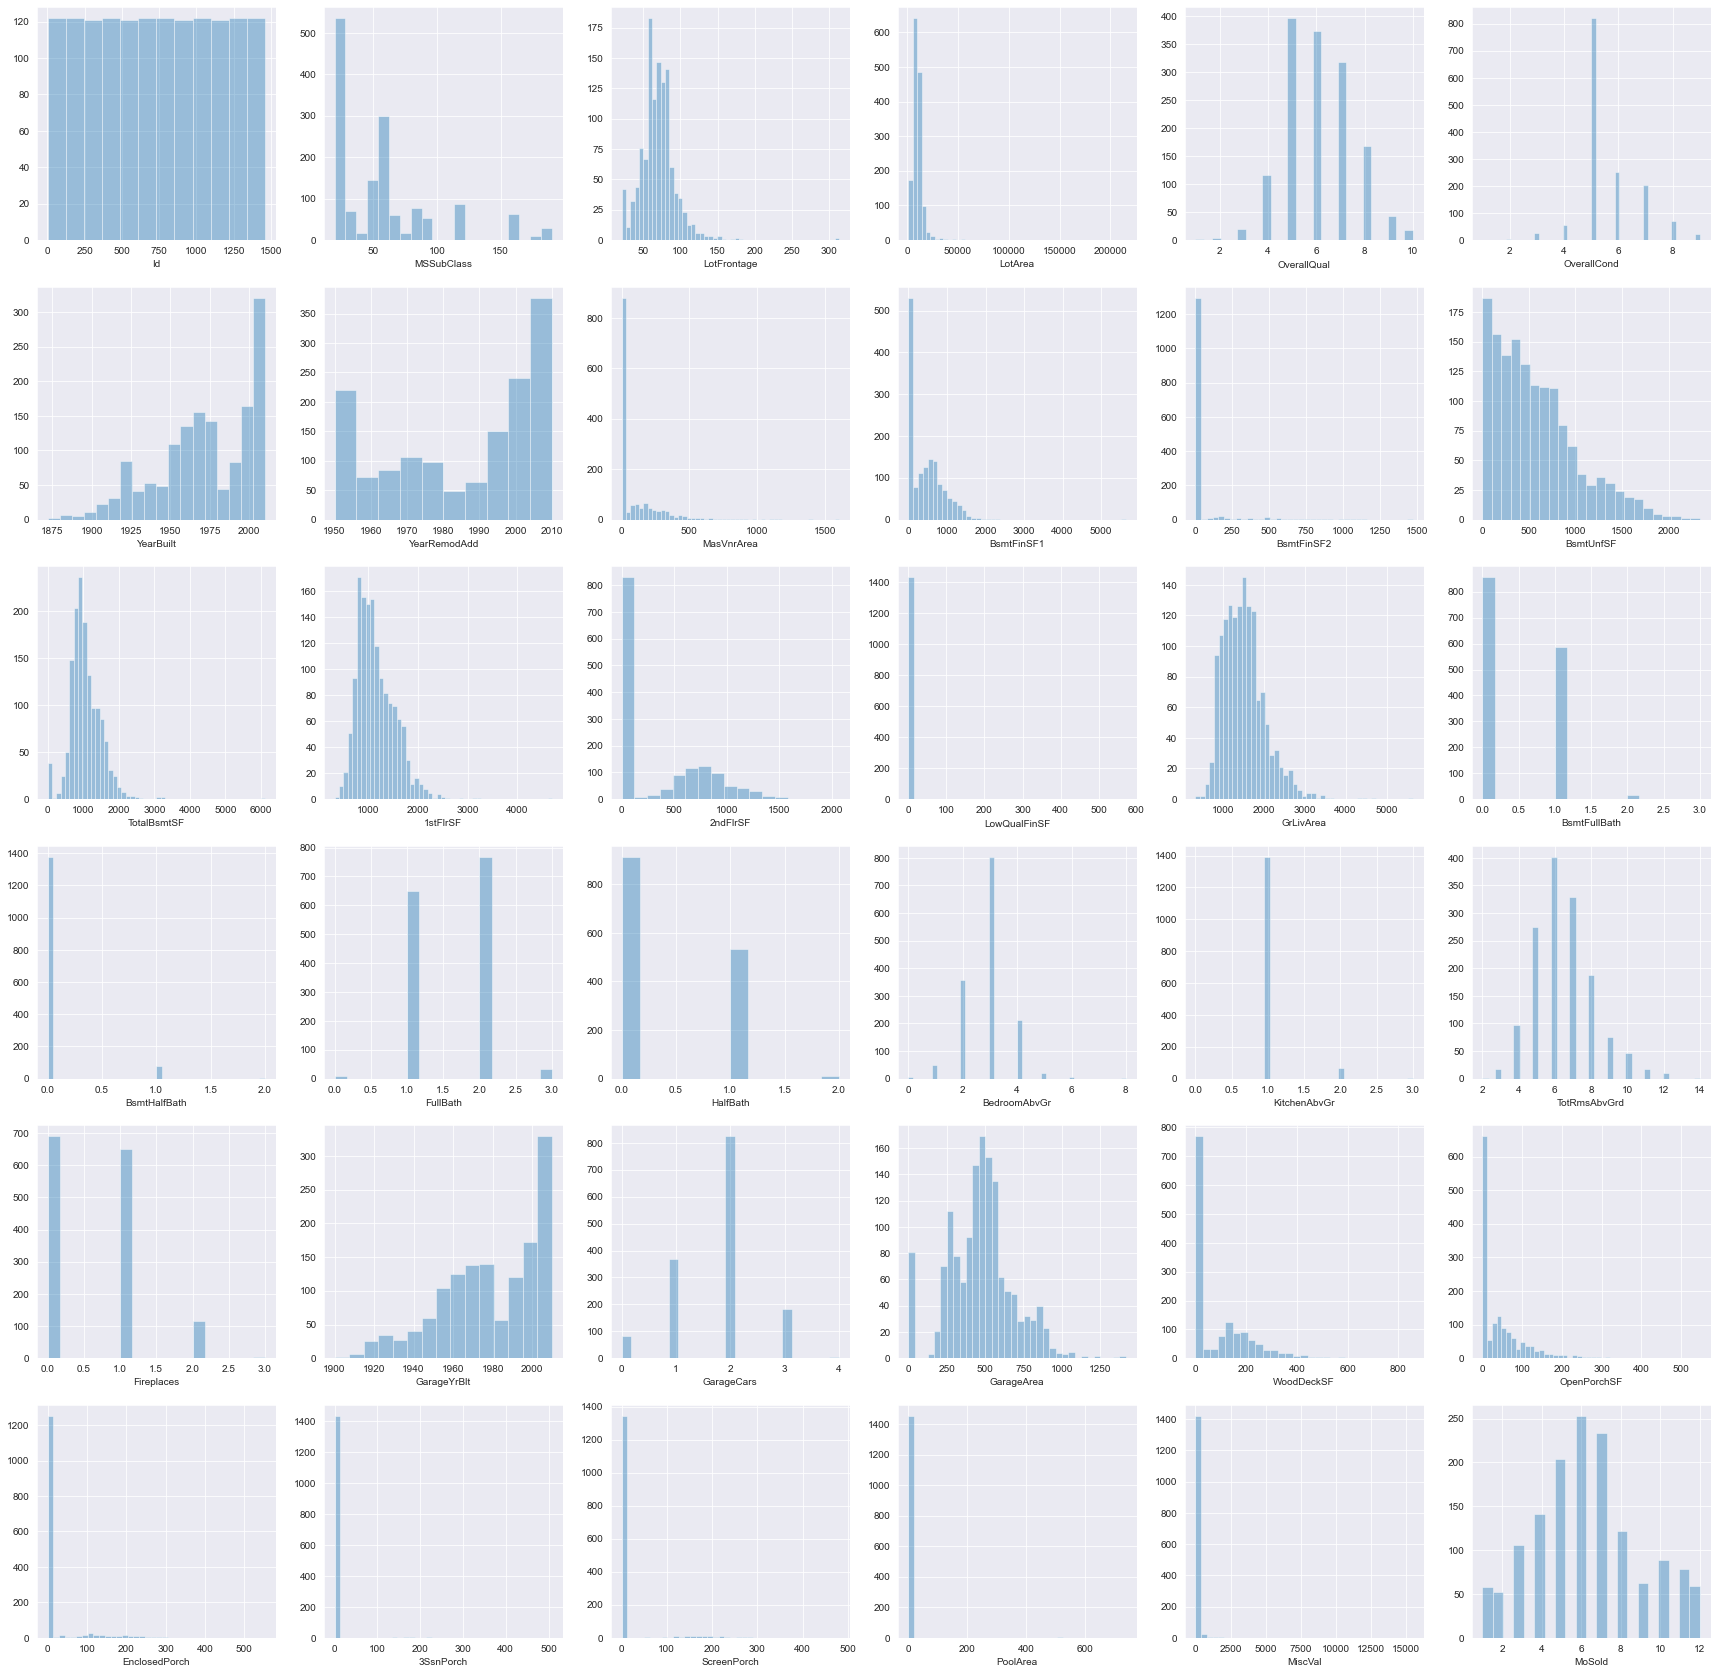

In [22]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(30,30))
for i, col in enumerate(numerical_cols[0:-2]): 
    sns.distplot(df[col], kde=False, ax=axes[i//6,i%6])

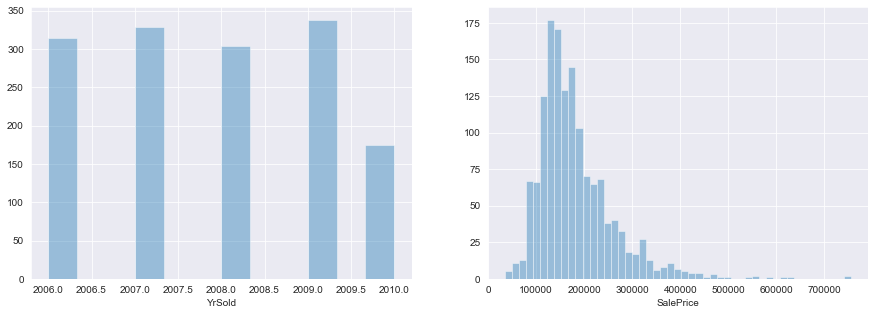

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for i, col in enumerate(numerical_cols[36:]): 
    sns.distplot(df[col], kde=False, ax=axes[i])

# Bivariate Distribution (Heatmap)

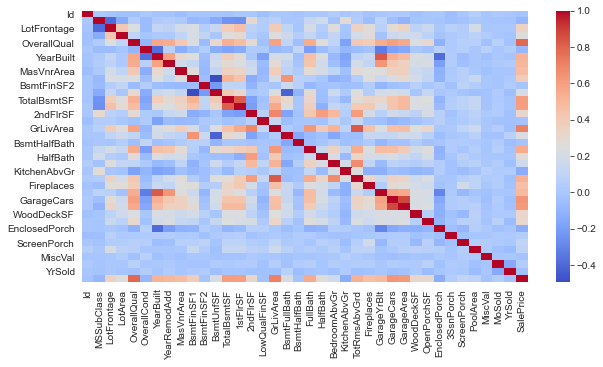

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(df[numerical_cols].corr(), annot=False, cmap='coolwarm', fmt='.1f')

# Web Scraping

In [121]:
from bs4 import BeautifulSoup
import requests

In [122]:
res = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0]
df_can = pd.read_html(str(table))

In [124]:
df = df_can[0]

df.columns = df.iloc[0]
df = df[1:]

df.head()

,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"


# Spatial Data

In [143]:
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [144]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

In [170]:
address = 'New York, USA'

geolocator = Nominatim(user_agent="nyc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [171]:
map_nyc = folium.Map(location=[latitude, longitude], zoom_start=12)

map_nyc

In [167]:
cu_lat = 40.8075
cu_lng = -73.9626

In [173]:
map_cu = folium.Map(location=[cu_lat, cu_lng], zoom_start=16)

folium.CircleMarker(
    [cu_lat, cu_lng],
    radius=10,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_cu)

map_cu

# Chloropleth Maps

In [20]:
#!conda install -c plotly plotly
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [23]:
df_px = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth(df_px, geojson=geojson, color="Bergeron",
                    locations="district", featureidkey="properties.district",
                    projection="mercator"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()

#py.plot({"data": fig}, output_type="div", show_link="False", include_plotlyjs="False", link_text="")
py.plot(dict(data=fig), include_plotlyjs=False, output_type='div')

'<div>                            <div id="f4056fd5-802c-4ab4-ab83-1400179c35c8" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("f4056fd5-802c-4ab4-ab83-1400179c35c8")) {                    Plotly.newPlot(                        "f4056fd5-802c-4ab4-ab83-1400179c35c8",                        [{"coloraxis": "coloraxis", "featureidkey": "properties.district", "geo": "geo", "geojson": {"features": [{"geometry": {"coordinates": [[[[-73.6363215300962, 45.5759177646435], [-73.6362833815582, 45.5758266113331], [-73.6446417578686, 45.5658132919643], [-73.6453511352974, 45.5647725775888], [-73.648867564748, 45.5586898267402], [-73.6513170845065, 45.5545659435652], [-73.6515658357324, 45.5554439857955], [-73.6660837831645, 45.5596724837829], [-73.6706609041685, 45.5610978251999], [-73.6676019919116, 